In [2]:
import pandas as pd
data=pd.read_csv("/content/BankWages.csv")
print(data)

     rownames     job  education  gender minority
0           1  manage         15    male       no
1           2   admin         16    male       no
2           3   admin         12  female       no
3           4   admin          8  female       no
4           5   admin         15    male       no
..        ...     ...        ...     ...      ...
469       470   admin         12    male      yes
470       471   admin         15    male      yes
471       472   admin         15    male       no
472       473   admin         12  female       no
473       474   admin         12  female       no

[474 rows x 5 columns]


In [3]:
data.isnull().sum()

rownames     0
job          0
education    0
gender       0
minority     0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["job"]=b.fit_transform(data["job"])
data["gender"]=b.fit_transform(data["gender"])
data["minority"]=b.fit_transform(data["minority"])
print(data)

     rownames  job  education  gender  minority
0           1    2         15       1         0
1           2    0         16       1         0
2           3    0         12       0         0
3           4    0          8       0         0
4           5    0         15       1         0
..        ...  ...        ...     ...       ...
469       470    0         12       1         1
470       471    0         15       1         1
471       472    0         15       1         0
472       473    0         12       0         0
473       474    0         12       0         0

[474 rows x 5 columns]


In [5]:
x=data.drop("minority",axis=1)
y=data["minority"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

     rownames  job  education  gender
380       381    0         17       1
45         46    0         15       0
257       258    0          8       1
263       264    0         12       0
48         49    0         15       1
..        ...  ...        ...     ...
159       160    2         16       1
404       405    0         12       0
364       365    0          8       0
72         73    0         12       0
189       190    0          8       0

[464 rows x 4 columns]
380    1
45     0
257    0
263    0
48     0
      ..
159    0
404    1
364    1
72     0
189    0
Name: minority, Length: 464, dtype: int64


In [6]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)
c=br.predict([[475,1,13,0]])
print("Output :",c)

Output : [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(array([[ 39.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  14.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [139.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  51.],
        [  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [ 90.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26.],
        [ 60.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
        [  8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [ 26.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [  3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 8. ,  9.3, 10.6, 11.9, 13.2, 14.5, 15.8, 17.1, 18.4, 19.7, 21. ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <matplotlib.collections.QuadMesh at 0x7eeb4b1662d0>)

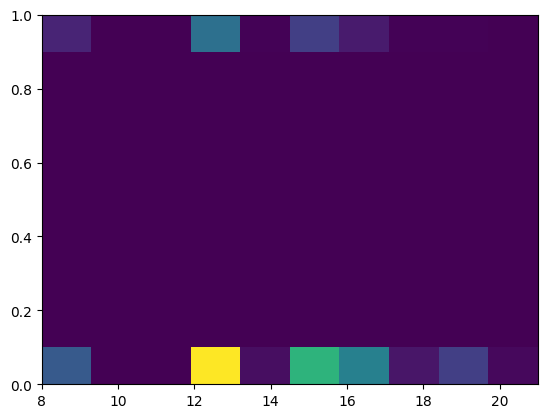

In [7]:
from matplotlib import pyplot as plt
plt.hist2d(data["education"],data["minority"])

In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[7 0]
 [3 0]]


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.7


In [13]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
